In [1]:
import math
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('daily_data.csv')

In [3]:
df=df.set_index('Date')

In [4]:
df.shape

(1400, 1)

In [5]:
# df['total'].isnull().sum()
# df['total']=df['total'].astype(int)
df.dtypes

Consumption (Kwh)    float64
dtype: object

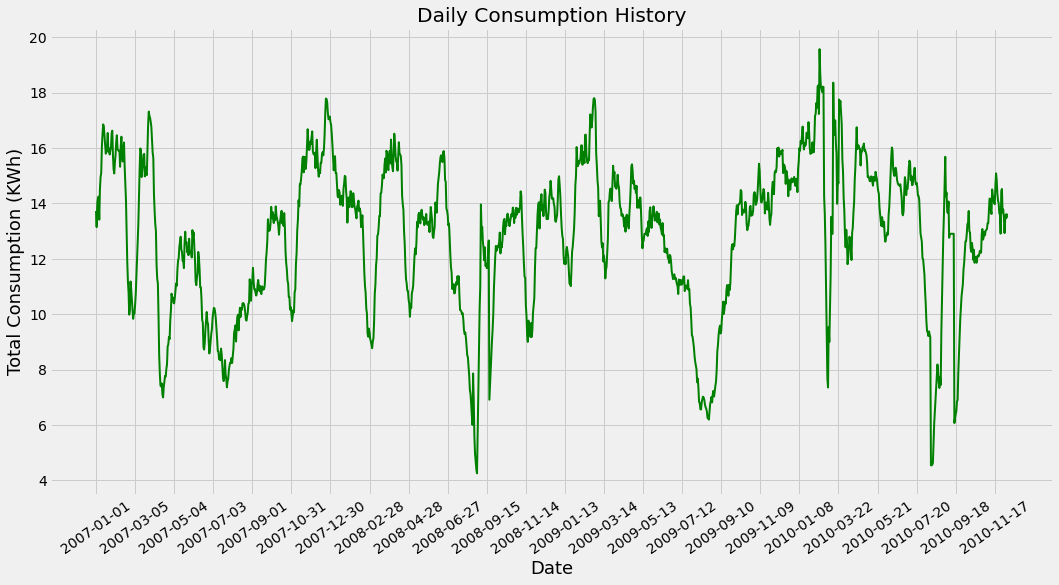

In [6]:
plt.figure(figsize=(16,8))
plt.title("Daily Consumption History")
plt.plot(df['Consumption (Kwh)'],linewidth=2,color='green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Consumption (KWh)',fontsize=18)
plt.xticks(rotation=35)
plt.xticks(np.arange(0,1400,60))
#plt.grid(False)
plt.show()

In [7]:
data=df.filter(['Consumption (Kwh)'])
dataset=data.values

training_data_len=math.ceil(len(dataset)*0.8)

training_data_len


1120

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.61837958],
       [0.58041952],
       [0.63738842],
       ...,
       [0.61041346],
       [0.6024435 ],
       [0.61228784]])

In [9]:
train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(90,len(train_data)):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    if i<=90:
        print(x_train)
        print(y_train)
        print()

[array([0.61837958, 0.58041952, 0.63738842, 0.64954501, 0.65245645,
       0.59794959, 0.66882272, 0.6979947 , 0.70834605, 0.76932873,
       0.79993339, 0.82272556, 0.8177669 , 0.79746366, 0.7768954 ,
       0.75353093, 0.7581439 , 0.77183303, 0.80239159, 0.75850495,
       0.76632127, 0.75172568, 0.76095931, 0.76807275, 0.80123163,
       0.8077766 , 0.75062717, 0.71715717, 0.70698251, 0.73267843,
       0.75041976, 0.77980299, 0.79701427, 0.76491933, 0.76161612,
       0.76054065, 0.76054065, 0.72269198, 0.77084975, 0.79360735,
       0.75446428, 0.73505598, 0.76010278, 0.78000656, 0.72288018,
       0.68155161, 0.64447112, 0.56738719, 0.49826554, 0.45276186,
       0.42673945, 0.37403016, 0.38633655, 0.45227022, 0.43418705,
       0.41156772, 0.39083046, 0.36435482, 0.37635393, 0.37596984,
       0.39635758, 0.4217347 , 0.46238343, 0.50516388, 0.53912552,
       0.58724872, 0.65443838, 0.71644276, 0.76596407, 0.76111679,
       0.69846713, 0.71318948, 0.73061201, 0.7512955 , 0.7530

In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1030, 90, 1)

In [12]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1))) 
#model.add(Dropout(0.2))
model.add(LSTM(60))
model.add(Dropout(0.2))
tf.keras.layers.Dense(10, activation="relu")
model.add(Dense(1))
tf.keras.layers.Lambda(lambda x: x * 400)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [13]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 43,981
Trainable params: 43,981
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=model.fit(x_train,y_train,batch_size=200,epochs=150,verbose=1,callbacks=[lr_schedule])

Epoch 1/150
6/6 [==============================] - 1s 123ms/step - loss: 0.1631 - mae: 0.5438
Epoch 2/150
6/6 [==============================] - 1s 204ms/step - loss: 0.1635 - mae: 0.5443
Epoch 3/150
6/6 [==============================] - 1s 219ms/step - loss: 0.1635 - mae: 0.5445
Epoch 4/150
6/6 [==============================] - 1s 218ms/step - loss: 0.1640 - mae: 0.5453
Epoch 5/150
6/6 [==============================] - 1s 220ms/step - loss: 0.1640 - mae: 0.5451
Epoch 6/150
6/6 [==============================] - 1s 231ms/step - loss: 0.1641 - mae: 0.5454
Epoch 7/150
6/6 [==============================] - 2s 262ms/step - loss: 0.1627 - mae: 0.5429
Epoch 8/150
6/6 [==============================] - 1s 246ms/step - loss: 0.1636 - mae: 0.5445
Epoch 9/150
6/6 [==============================] - 1s 113ms/step - loss: 0.1637 - mae: 0.5447
Epoch 10/150
6/6 [==============================] - 1s 173ms/step - loss: 0.1634 - mae: 0.5440
Epoch 11/150
6/6 [==============================] - 1s 220m

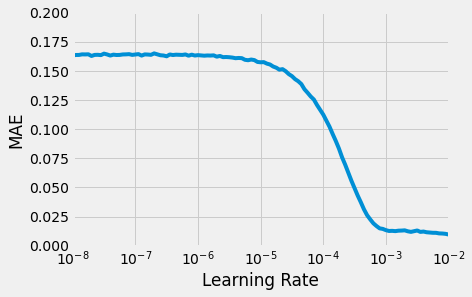

In [22]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-2, 0, 0.2])
plt.xlabel('Learning Rate')
plt.ylabel('MAE')

plt.tight_layout
plt.savefig('figure.png', bbox_inches="tight")

In [25]:
optimizer = tf.keras.optimizers.SGD(lr=9e-3, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


history = model.fit(x_train,y_train,batch_size=200,epochs=100,verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 120ms/step - loss: 0.0022 - mae: 0.0487
Epoch 2/100
6/6 [==============================] - 1s 116ms/step - loss: 0.0022 - mae: 0.0486
Epoch 3/100
6/6 [==============================] - 1s 244ms/step - loss: 0.0022 - mae: 0.0485
Epoch 4/100
6/6 [==============================] - 2s 254ms/step - loss: 0.0022 - mae: 0.0483
Epoch 5/100
6/6 [==============================] - 1s 245ms/step - loss: 0.0022 - mae: 0.0481
Epoch 6/100
6/6 [==============================] - 2s 269ms/step - loss: 0.0022 - mae: 0.0479
Epoch 7/100
6/6 [==============================] - 2s 253ms/step - loss: 0.0022 - mae: 0.0488
Epoch 8/100
6/6 [==============================] - 2s 257ms/step - loss: 0.0022 - mae: 0.0482
Epoch 9/100
6/6 [==============================] - 2s 268ms/step - loss: 0.0022 - mae: 0.0489
Epoch 10/100
6/6 [==============================] - 2s 259ms/step - loss: 0.0023 - mae: 0.0491
Epoch 11/100
6/6 [==============================] - 2s 263m

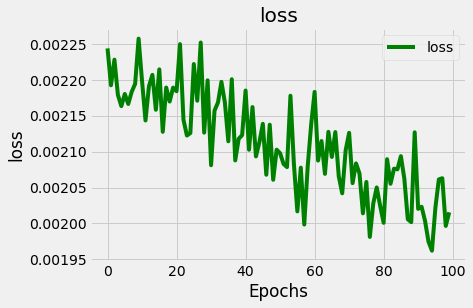

<Figure size 432x288 with 0 Axes>

In [26]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

loss=history.history['loss']

epochs=range(len(loss))

plt.plot(epochs, loss, 'g')
plt.title('loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss"])
# plt.axis([0, 100, 0, 0.015])
plt.figure()


plt.savefig('loss vs epoch.png', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

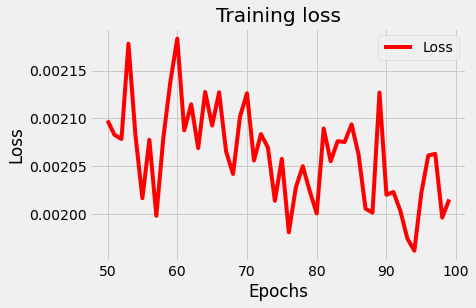

<Figure size 432x288 with 0 Axes>

In [27]:
zoomed_loss = loss[50:]
zoomed_epochs = range(50,100)

plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
# plt.axis([80, 100, 0.02, 0.018])
plt.figure()

In [29]:
test_data=scaled_data[training_data_len-90:,:]
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(90,len(test_data)):
    x_test.append(test_data[i-90:i,0])
    

In [30]:
x_test=np.array(x_test)

In [31]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [32]:
predictions=model.predict(x_test)

predictions= scaler.inverse_transform(predictions)

In [33]:
predictions.shape

(280, 1)

In [34]:
rmse= np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

1.6031600105751769

In [35]:
import warnings
warnings.filterwarnings("ignore")

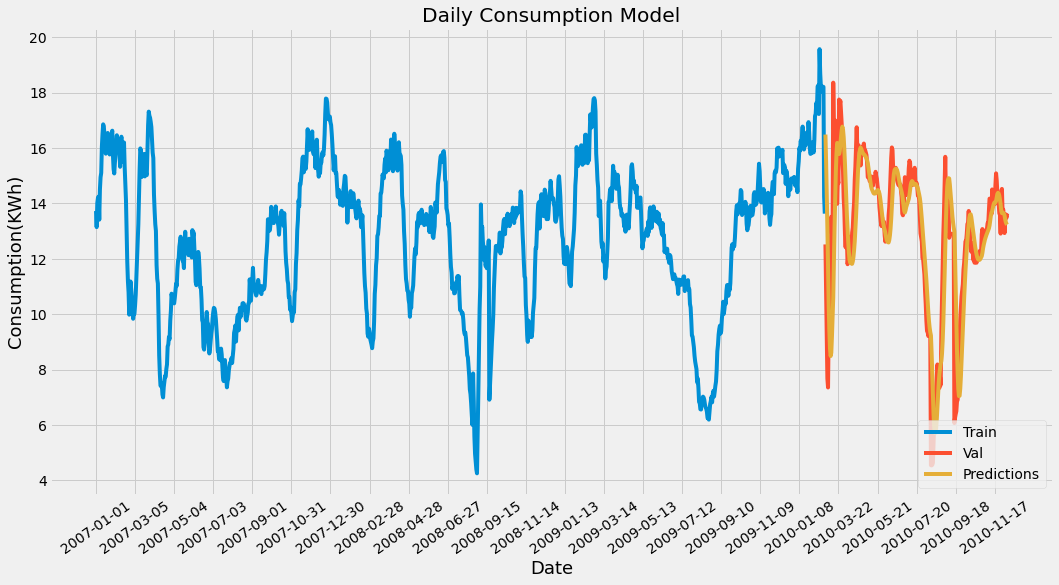

In [36]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title("Daily Consumption Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Consumption(KWh)',fontsize=18)
plt.plot(train['Consumption (Kwh)'])
plt.plot(valid[['Consumption (Kwh)','Predictions']])
plt.legend(["Train","Val","Predictions"],loc='lower right')
plt.xticks(rotation=35)
plt.xticks(np.arange(0,1400,60))
plt.show()

In [37]:
valid

,Consumption (Kwh),Predictions
Date,,
2010-03-02,12.521857,16.489372
2010-03-03,11.006000,15.544808
2010-03-04,9.258857,14.423385
2010-03-05,7.681143,13.127606
2010-03-06,7.357071,11.701799
...,...,...
2010-12-02,12.932706,13.569416
2010-12-03,13.406882,13.429801
2010-12-04,13.605824,13.322709


In [38]:
#predict

last_90_days= data[-90:].values

last_90_days_scaled = scaler.transform(last_90_days)

X_test=[]
X_test.append(last_90_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_consumption=model.predict(X_test)

pred_consumption= scaler.inverse_transform(pred_consumption)

print(float(pred_consumption))

13.23393440246582


In [39]:
def evaluate(pre,test_labels):
    errors=abs(pre-test_labels)
    mape=100*np.mean(errors/test_labels)
    accuracy= 100-mape
    print("Accuracy: {:0.2f}%".format(accuracy))

In [40]:
evaluate(predictions,y_test)

Accuracy: 90.27%


In [41]:
model.save("win_model.h5")

In [85]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'transformer' is not defined